## 라이브러리 로드

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [90]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [91]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [6]:
#표본 추출
sample_means = []
n_samples = 1000  # 표본 추출 횟수
sample_size = 50   # 각 표본의 크기

for _ in range(n_samples):
  sample = df['TotalPrice'].sample(n=sample_size)
  sample_means.append(np.mean(sample))


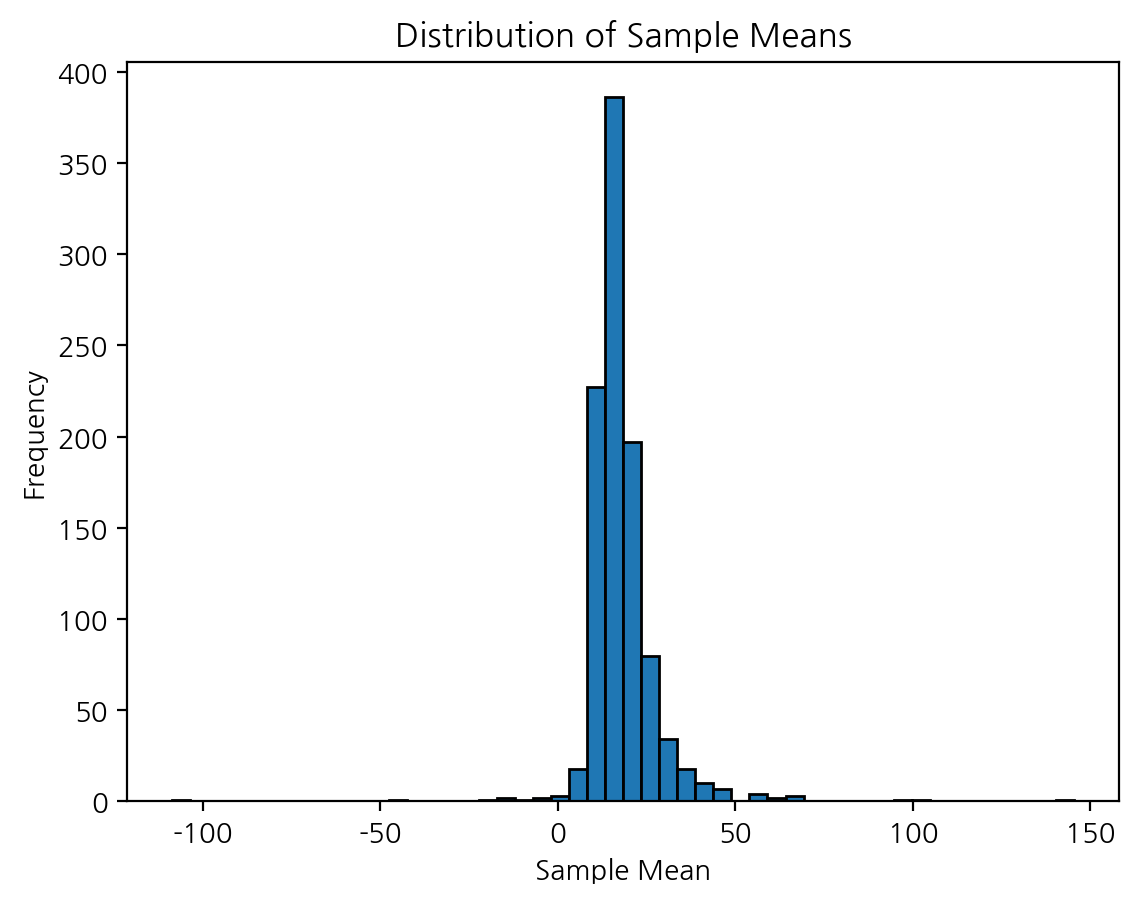

In [24]:
plt.hist(sample_means, bins=50, edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [25]:
df['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [23]:
# 전체 데이터셋의 평균 및 표준편차
total_mean = np.mean(df['TotalPrice'])
total_std = np.std(df['TotalPrice'])

# 표본 평균들의 평균 및 표준편차
sample_means_mean = np.mean(sample_means)
sample_means_std = np.std(sample_means)

# 결과 출력
print(f"전체 데이터셋의 평균: {total_mean}, 표준편차: {total_std}")
print(f"표본 평균들의 평균: {sample_means_mean}, 표준편차: {sample_means_std}")
print('표준편차 차이 :', sample_means_mean - total_mean, '표준편차 차이 :', total_std - sample_means_std)

전체 데이터셋의 평균: 17.98779487699964, 표준편차: 378.8104739906518
표본 평균들의 평균: 18.027574200000004, 표준편차: 10.852447652769138
표준편차 차이 : 0.039779323000363576 표준편차 차이 : 367.9580263378827


In [63]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.689453,17.987795
std,218.081158,96.759853,1713.600342,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


전체 데이터셋의 표준편차가 표본에 다소 비해 큰 것으로 확인되어 그래프를 확인하였을 때 가격이 광범위하게 분포된 것이 아닌 min, max에 이상치로 인한 차이로 보여집니다.

데이터의 평균은 샘플과 표본이 유사하며 평균 히스토그램이 정규분포 모양을 띄고 있어 표본을 대표하는 것으로 보여집니다.

'TotalPrice'의 min, max가 동일하며 -인 값이 확인되어 이상치 탐색이 필요해보입니다.

In [86]:
# - 가격인 행 탐색
df[df['TotalPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
939,536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50
3170,536606,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-2,2010-12-02 09:10:00,2.95,14092.0,United Kingdom,-5.90
3338,536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,2010-12-02 10:37:00,8.50,12471.0,Germany,-17.00
...,...,...,...,...,...,...,...,...,...
540080,581463,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-2,2011-12-08 18:56:00,7.95,17526.0,United Kingdom,-15.90
540176,581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom,-8.32
540422,581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
541541,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69


TotalPrice가 음수인 값은 InvoiceNo에 C가 함께 있는 것으로 확인되었습니다.
1. InvoiceNo에 C를 제거하면 원 주문건과 취소건의 중복값이 생길 것으로 예상
2. 중복값을 제거하여 원 주문건과 취소건 모두 제거하여 취소 데이터를 제거해보겠습니다.

In [101]:
# 'InvoiceNo' 열의 C 제거
df['InvoiceNo'] = df['InvoiceNo'].str.replace('C', '', regex=False)

In [97]:
# 'InvoiceNo'에 생긴 중복값 제거
df = df.drop_duplicates(subset='InvoiceNo', keep=False)

In [98]:
# 중복값 제거 확인
df['InvoiceNo'].value_counts()

536369    1
565043    1
565026    1
565023    1
565001    1
         ..
550484    1
550482    1
550472    1
550466    1
581568    1
Name: InvoiceNo, Length: 5841, dtype: int64

In [100]:
# 'TotalPrice' 이상치 추가 탐색
df[df['TotalPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
939,536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50
3170,536606,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-2,2010-12-02 09:10:00,2.95,14092.0,United Kingdom,-5.90
3338,536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,2010-12-02 10:37:00,8.50,12471.0,Germany,-17.00
...,...,...,...,...,...,...,...,...,...
540080,581463,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-2,2011-12-08 18:56:00,7.95,17526.0,United Kingdom,-15.90
540176,581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom,-8.32
540422,581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
541541,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69


TotalPrice에 아직 -값이 남아있으며 min, max이상치인 -168469.60도 아직 확인되며<br/>
같은 InoviceNo 취소건수 외 가격할인 등 추가 요소가 있는 것으로 보여집니다.

In [108]:
#이상치 탐색
df[(df['TotalPrice'] > 100000) | (df['TotalPrice'] < -100000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6
540422,581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


이상치인 min, max는 서로 다른 InvoiceNo이며 숫자도 1개씩 차이가 있는 패턴임이 확인됩니다.


In [132]:
# 다른 주문 건들도 동일 패턴인지 확인
df[(df['InvoiceNo'] == '581568') | (df['InvoiceNo'] == '581569')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
541715,581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75


다른 데이터들은 위아래 값이 나오지 않는 것으로 확인되어 이상치만 제거 후 마이너스 값들은 모두 제거하겠습니다.

In [133]:
# 이상치 제거
df = df[(df['TotalPrice'] <= 100000) & (df['TotalPrice'] > 0)]

In [148]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,DayOfWeek
count,1611.000000,1611.000000,1388.000000,1611.000000,1611.000000
mean,146.206083,61.663110,15405.473633,285.829950,2.289261
std,1871.090116,547.860175,1790.156494,2241.565205,1.633349
min,1.000000,0.060000,12346.000000,0.380000,0.000000
25%,2.000000,1.250000,13777.000000,14.950000,1.000000
50%,12.000000,2.890000,15505.000000,42.960000,2.000000
75%,60.000000,6.750000,16998.000000,180.000000,4.000000
max,74215.000000,13541.330000,18283.000000,77183.600000,6.000000


## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [134]:
from scipy import stats


In [135]:
# 국가 별 totalprice describe
desc = df.groupby('Country')['TotalPrice'].describe()
sorted_desc = desc.sort_values(by='count').tail(2)
sorted_desc

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Germany,23.0,134.614783,174.449848,3.00,25.25,50.00,183.375,599.5
United Kingdom,1473.0,271.956130,2328.531973,0.38,13.20,39.95,175.200,77183.6


In [136]:
# Germany에 해당하는 데이터 추출
Germany = sorted_desc.loc['Germany']

# United Kingdom에 해당하는 데이터 추출
UK = sorted_desc.loc['United Kingdom']

In [137]:
# 난수 생성기의 시드 값을 설정.
np.random.seed(0)

# 독일과 영국 데이터의 평균과 표준편차를 기반으로 정규 분포된 난수를 생성.
germany_sample = np.random.normal(loc=Germany['mean'], scale=Germany['std'], size=int(Germany['count']))
uk_sample = np.random.normal(loc=UK['mean'], scale=UK['std'], size=int(UK['count']))

# 독립표본 t-검정을 수행. 두 집단의 분산이 다르다고 가정하기 때문에 equal_var=False를 설정.
t_stat, p_value = stats.ttest_ind(germany_sample, uk_sample, equal_var=False)

# t-통계량과 p-값을 반환.
t_stat, p_value

(0.04748508955497592, 0.9621660921980947)

p-값이 0.9로 귀무가설이 참으로 두 국가 간의 'TotalPrice'가 유의미한 차이가 없는 것으로 보여집니다.
<br/>

1종 오류 : 두 국가 간 평균 'TotalPrice'에 차이가 없는데 차이가 있다고 판단<br/>
2종 오류 : 두 국가 간 평균 'TotalPrice'에 실제 차이가 있는데 이를 감지하지 못하는 경우

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [138]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

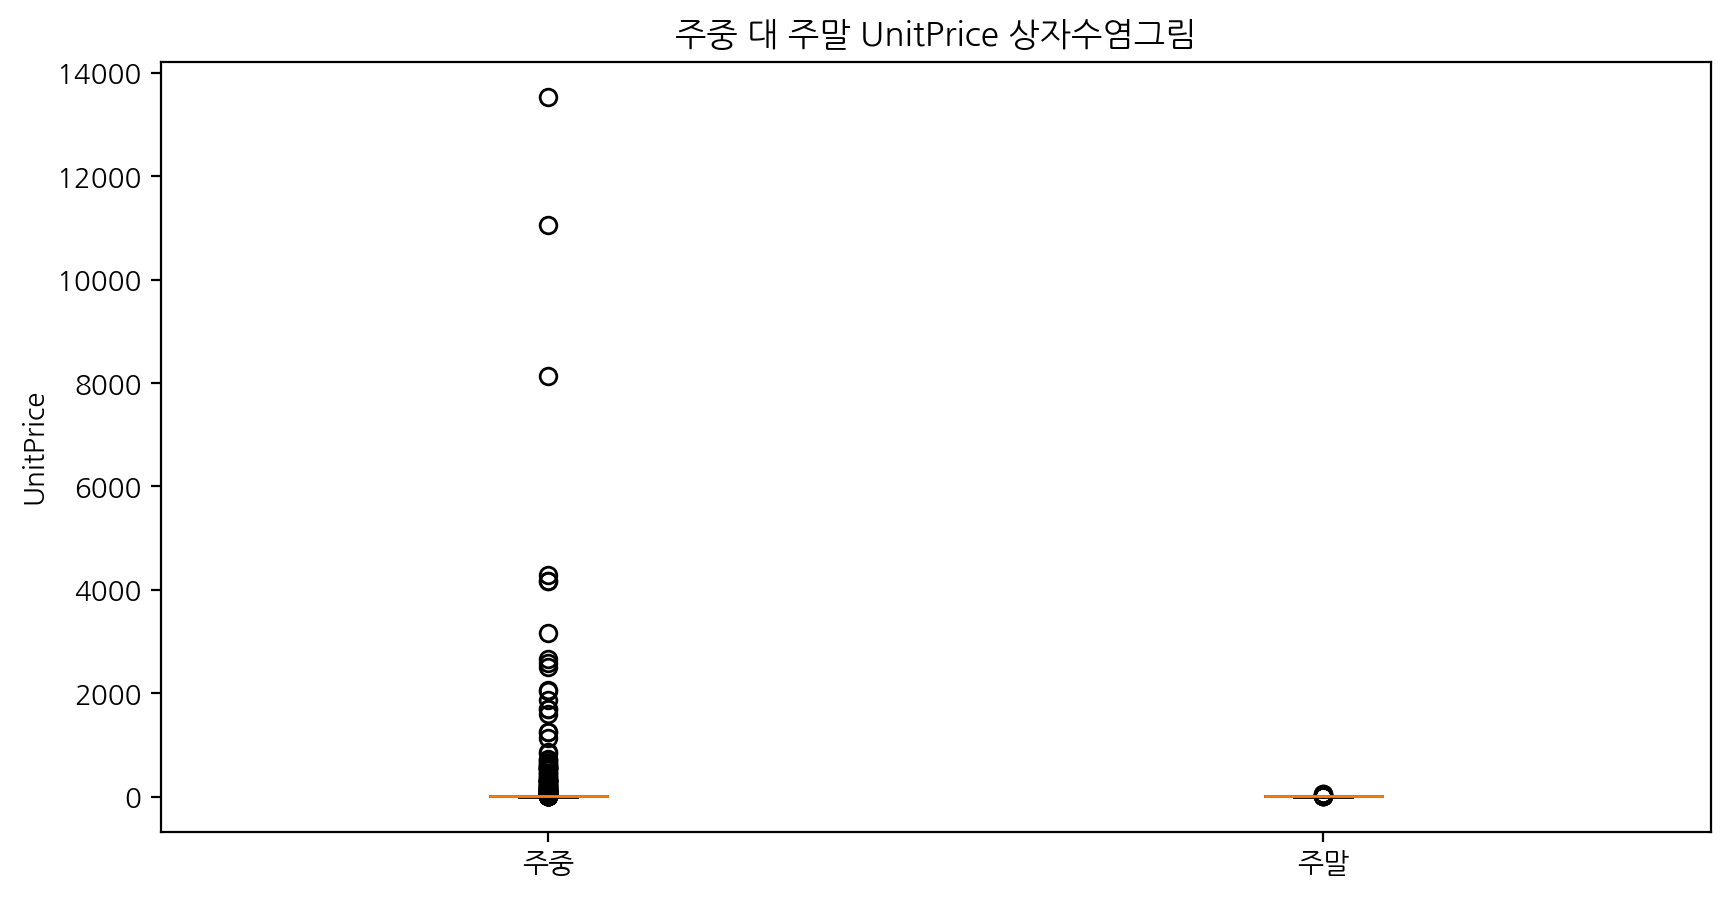

In [140]:
plt.figure(figsize=(10, 5))
plt.boxplot([weekday_data['UnitPrice'], weekend_data['UnitPrice']], labels=['주중', '주말'])
plt.title('주중 대 주말 UnitPrice 상자수염그림')
plt.ylabel('UnitPrice')
plt.show()

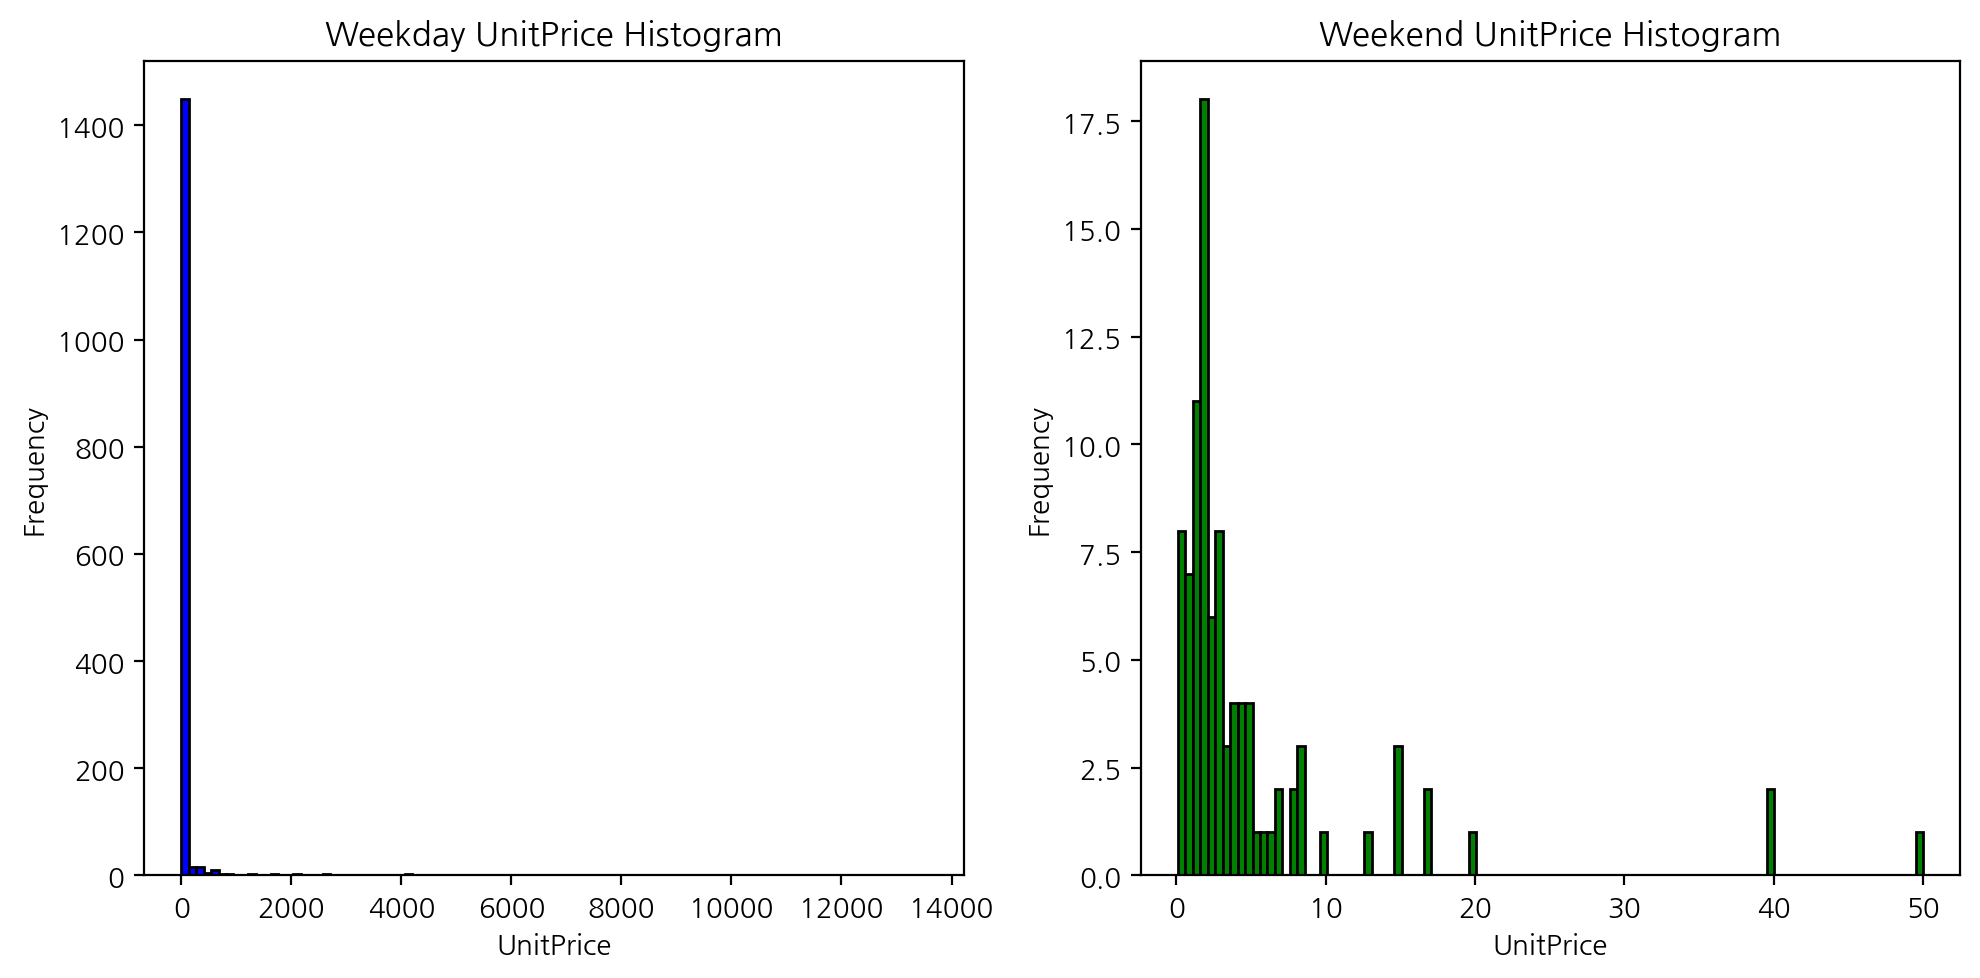

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 첫 번째 축에 평일 데이터에 대한 히스토그램을 100개의 구간으로 표시
axes[0].hist(weekday_data['UnitPrice'], bins=100, color='blue', edgecolor='black')
axes[0].set_title('Weekday UnitPrice Histogram')
axes[0].set_xlabel('UnitPrice')
axes[0].set_ylabel('Frequency')

# 두 번째 축에 주말 데이터에 대한 히스토그램을 100개의 구간으로 표시
axes[1].hist(weekend_data['UnitPrice'], bins=100, color='green', edgecolor='black')
axes[1].set_title('Weekend UnitPrice Histogram')
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [142]:
weekday_descriptive_stats = weekday_data['UnitPrice'].describe()
weekend_descriptive_stats = weekend_data['UnitPrice'].describe()

weekday_descriptive_stats, weekend_descriptive_stats

(count     1517.000000
 mean        65.166704
 std        564.399811
 min          0.060000
 25%          1.250000
 50%          2.890000
 75%          6.950000
 max      13541.330000
 Name: UnitPrice, dtype: float64,
 count    94.000000
 mean      5.121064
 std       8.117688
 min       0.120000
 25%       1.450000
 50%       2.550000
 75%       4.950000
 max      50.000000
 Name: UnitPrice, dtype: float64)

weekday_data데이터 세트는 높은 표준편차를 가지고 있어 넓게 퍼져있으며 boxplot을 확인하였을 때 주말보다 넓게 UnitPrice가 분포된 것을 확인할 수 있습니다. <br/>
weekend_data 데이터 세트는 상대적으로 낮은 표준편차를 가지고 있어 값들이 평균 주변에 더 가깝게 모여있습니다
<br/>

주중에는 다양한 가격대의 제품이 판매되지만 주말에는 제품 판매폭이 명확한 것으로 보여집니다.

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [152]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [153]:
# Mann-Whitney U-검정 수행

TotalPrice_WeekDay = weekday_data['TotalPrice'].median()
TotalPrice_WeekEnd = weekend_data['TotalPrice'].median()

In [154]:
# Mann-Whitney U-검정 수행
# u_statistic, p_value

stats.mannwhitneyu(TotalPrice_WeekDay, TotalPrice_WeekEnd)

MannwhitneyuResult(statistic=1.0, pvalue=1.0)

p 값이 1.0으로 귀무 가설이 참, 주중과 주말 간에 'TotalPrice' 이 통계적으로 중앙값 간의 차이가 없는 것으로 확인됩니다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [155]:
from scipy import stats
from scipy.stats import t

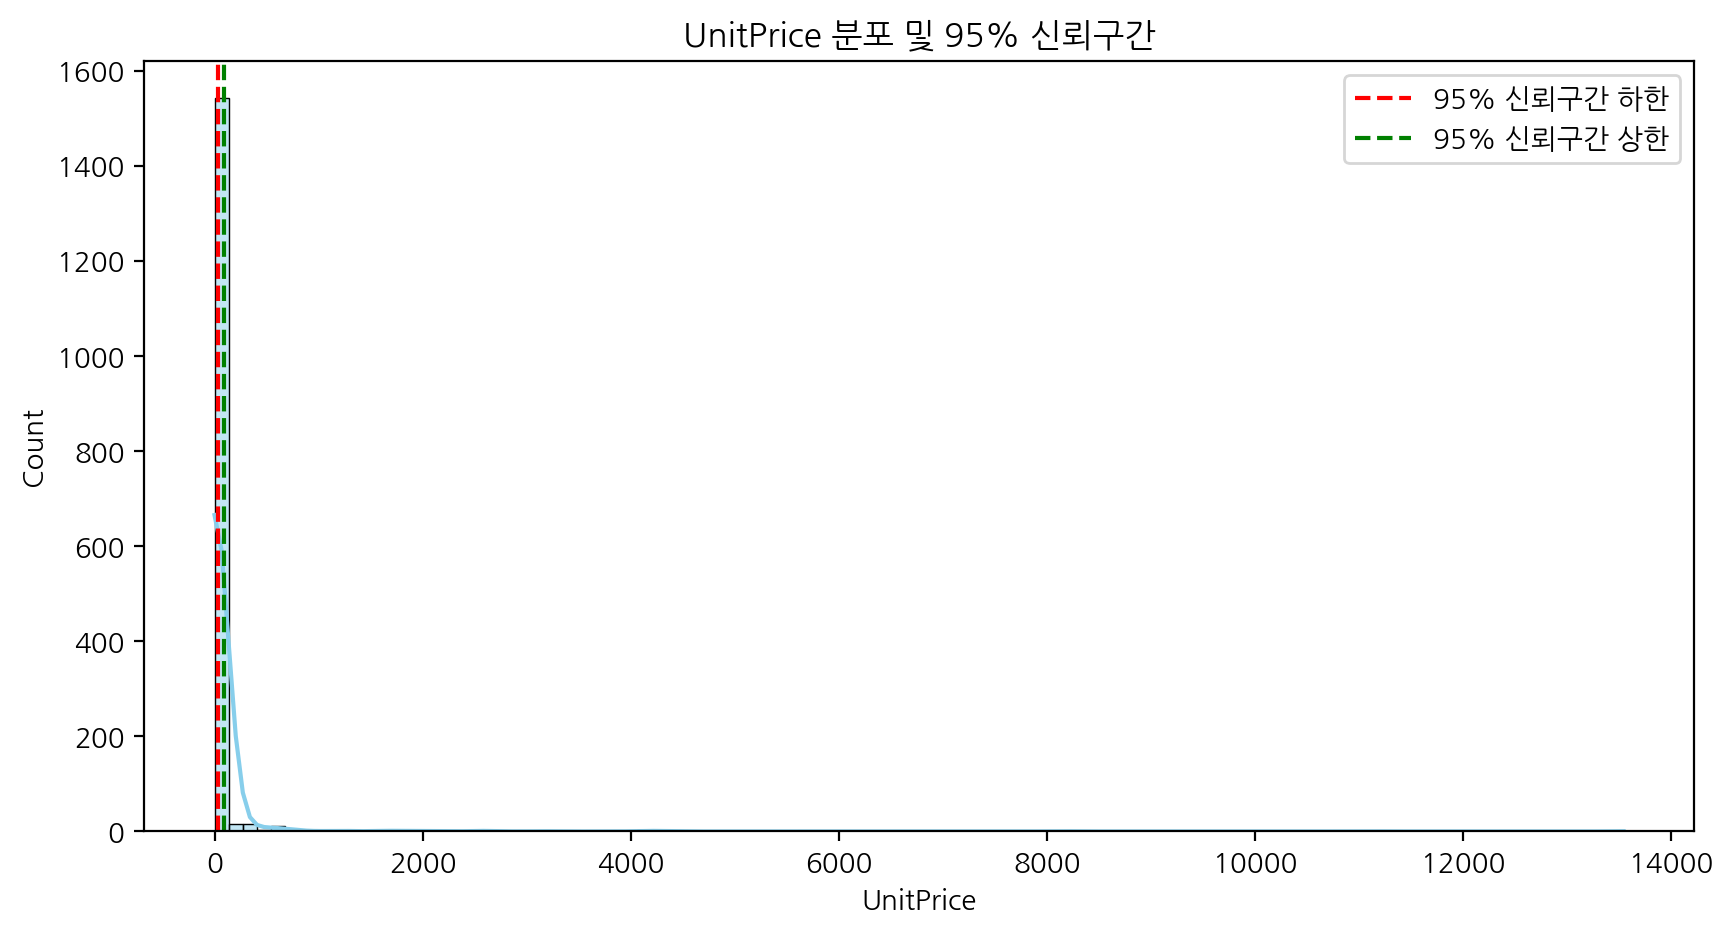

((34.890132862068484, 88.43608687722387), 61.66310986964618)

In [158]:
# UnitPrice 컬럼 데이터 추출
unitprice_data = df['UnitPrice']

# 표본 크기
n = len(unitprice_data)

# 평균과 표준편차 계산
mean_unitprice = np.mean(unitprice_data)
std_unitprice = np.std(unitprice_data, ddof=1)  #(자유도 보정)

# 신뢰구간 계산 (95% 신뢰수준)
confidence_level = 0.95
degrees_freedom = n - 1
t_critical = t.ppf((1 + confidence_level) / 2, degrees_freedom)

margin_of_error = t_critical * (std_unitprice / np.sqrt(n))
confidence_interval = (mean_unitprice - margin_of_error, mean_unitprice + margin_of_error)

# 시각화
plt.figure(figsize=(10, 5))
sns.histplot(unitprice_data, kde=True, color='skyblue', bins=100)
plt.title('UnitPrice 분포 및 95% 신뢰구간')
plt.xlabel('UnitPrice')
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='95% 신뢰구간 하한')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% 신뢰구간 상한')
plt.legend()
plt.show()

confidence_interval, mean_unitprice

95% 신뢰 구간은 34~ 88로 그래프로 확인하였을 때 고가의 제품으로 인해 평균이 높음에도 신뢰 구간대의 판매 수가 압도적으로 높아 타겟이 명확한 것으로 보여집니다.

# 회고
데이터의 이상치로 인해 생각보다 시간 소모가 많이 되었고 완벽하게 제거하지는 못해 아쉬움이 남았습니다.
전처리가 된 데이터는 과제 출제의도와 결과가 다를 것으로 예상되고
진행했던 검정에 수식에 대한 자세한 지식이 없다보니 인사이트를 도출하는데도 확신이 없었습니다.

실제로 코드를 적용해보며 사용 방법에 대해서는 익숙해진 것 같아 도움이 되었고
나중에 데이터를 제대로 전처리하거나 제거 전 데이터로 다시 비교해보고 보고싶습니다.
